<a href="https://colab.research.google.com/github/Handrum/ML_Equipo_6/blob/main/TC4033_Activity_2b_ID__Equipo_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>
![Evidence 3](https://i.imgur.com/mu6ZuGT.jpg)

# **Master's in Applied Artificial Intelligence**
## **Course: Advanced Machine Learning Methods**
* ### **Lead Instructor**: José Antonio Cantoral Ceballos
* **Tutor**: Ana Bricia Galindo

## **Activity A2b: Building a CNN for CIFAR10 dataset using PyTorch Dataset**

*   --> Rafael Alexis Pinto Flórez | A01794500
*   --> Julio Baltazar Colín | A01794476
*   --> José Santiago Rueda Antonio | A01794118
*   --> Helmy Andrea Moreno Navarro | A01793918

# TC 5033
## **Deep Learning**
## **Convolutional Neural Networks (CNN)**
<br>

#### **Activity 2b**: Building a CNN for CIFAR10 dataset with PyTorch
<br>

- **Objective**

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- **Instructions**

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

##**Import Libraries**

To make deep learning methods work, the Torch Library of the **python** programming language is very important, especially for neural networks and machine learning, as it is one of the most flexible tools for work that has to do with Deep Learning.

To access all functions, classes and methods must be imported to the IDE, so we can work with tensors, build and train neural networks and access all the proposed content.

Likewise, we will continue working with numpy libraries for the necessary operations and matplotlib libraries to generate the graphs required for data analysis.

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt
import torch.optim as optim
#only if you have jupyterthemes
#from jupyterthemes import jtplot
#jtplot.style()

### **Download Cifar10 dataset**

**Overview**

- "The dataset contains a number of different subsets of the full food-101 data. The idea is to make a more exciting simple training set for image analysis than CIFAR10 or MNIST. For this reason the data includes massively downscaled versions of the images to enable quick tests. The data has been reformatted as HDF5 and specifically Keras HDF5Matrix which allows them to be easily read in. The file names indicate the contents of the file. For example

Example:

* food_c101_n1000_r384x384x3.h5 means there are 101 categories represented, with n=1000 images, that have a resolution of 384x384x3 (RGB, uint8)

* food_test_c101_n1000_r32x32x1.h5 means the data is part of the validation set, has 101 categories represented, with n=1000 images, that have a resolution of 32x32x1 (float32 from -1 to 1)"*

*Data set extracted from:* https://www.kaggle.com/datasets/kmader/food41/data


In [ ]:
#Graphics cards (GPUs) for general computing (other than graphics)
torch.cuda.is_available()

True

* The following code will help us to prepare the training, validation and test data of some model using the CIFAR10 dataset. Additionally, a transformation is performed to the images to convert them into tensors and then normalize them, so that there is a better **convergence of the training**, making use of optimization with gradient descent placing everything in the same range equally by updating the model parameters.

* Additionally, it helps us to avoid that certain** features dominate in one image channel** with higher values during training, which could cause the model to not learn correctly from the other channels.

* Normalizing the inputs helps their values fall in a region where the activation functions have more significant derivatives which would help the model stabilize and speed up training.

* Normalization helps to keep the numbers in a range that is manageable for computers, for the values that are found, whether they are very large or very small, it helps the model to generalize better in some cases.

* When you look at a photo on the computer, each dot in that photo, called a "pixel," has a number ranging from 0 to 255. If the photo is black and white, there is only one number per dot. But if it is in color, like most of the photos we see, each dot has three numbers: one for red, one for green and one for blue. Imagine that those numbers are like the paint mixtures to get the exact color of that dot.

- Now, when computers work with those pictures, sometimes they do better if they change those numbers on the dots to be between 0 and 1, or even between -1 and 1. It's as if we simplify the colors so that the computer understands them and works with them more easily. In the activity, they are using a **T.Normalize()** tool that does this adjustment of numbers so that, in general, the numbers are close to 0 and don't vary too much, subtract the mean and divide by the standard deviation for each channel, making sure that each channel has a mean of 0 and a standard deviation of 1. It's as if they want all the colors to be more balanced.

In [ ]:
DATA_PATH = '/content/sample_data' #Path where the dataset is located.

# Number of images to be used for training, validation and testing.
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000

# Minibatch size for training the model.
MINIBATCH_SIZE = 64

# Definition of the transformation to be applied to the images of the CIFAR10 set.
# T.ToTensor() converts a PIL or ndarray image to a tensor.
# T.Normalize() normalizes a tensor to a given mean and standard deviation.
transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Training data set.
# The CIFAR10 set is downloaded and the transformation defined above is applied.
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar)

# DataLoader for the training set.
# Uses random sampling of the first NUM_TRAIN images.
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
# Validation data set.
# The CIFAR10 set is downloaded and the transformation defined above is applied.
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                           transform=transform_cifar)

# DataLoader for the validation set.
# Uses a random sampling of the first NUM_VAL images.
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
# Test data set.
# The CIFAR10 set is downloaded and the transformation defined above is applied.
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_cifar)

# DataLoader for the test set.
# Uses random sampling of the images from NUM_VAL to the end of the set.
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


- Dataset: CIFAR10
- Dataset: Has 50,000 data points.
- Dataset type: "Train".
- Data is normalized using certain mean values and standard deviations for each color channel (RGB Channels).

***These transformations help the dataset to be in a suitable and standardized format to be processed by machine learning algorithms ***.

In [ ]:
#cifar10 training data
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /content/sample_data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

The following code: **train_loader.batch_size** seeks to determine how much data is handled together in a batch when using the training data loader, which is **train_loader**.

When working with ML, especially with neural networks, we do not introduce data one by one to the model. Instead, we use groups of data called batches. The **"batch size "** tells us how much data is processed together in each of these batches.

So, this code gives us the amount of data that are grouped and processed at the same time in the training process.

In [ ]:
# Gets the batch size (number of samples per batch) from the data loader 'train_loader'.
train_loader.batch_size

64

In [ ]:
#An iteration is performed to train_loader, printing the data and its corresponding labels or responses (assuming x are the data and y are the labels).
for i, (x, y) in enumerate(train_loader):
    print(x, y)

Se han truncado las últimas 5000 líneas del flujo de salida.
          [-1.6446e+00, -1.6608e+00, -1.6931e+00,  ...,  1.4539e+00,
            1.4216e+00,  1.3409e+00]],

         [[-1.6826e+00, -1.6826e+00, -1.6676e+00,  ..., -1.6075e+00,
           -1.5774e+00, -1.5774e+00],
          [-1.6525e+00, -1.6676e+00, -1.6676e+00,  ..., -1.5924e+00,
           -1.5774e+00, -1.5774e+00],
          [-1.6225e+00, -1.6375e+00, -1.6525e+00,  ..., -1.6525e+00,
           -1.5924e+00, -1.5774e+00],
          ...,
          [-1.5474e+00, -1.5624e+00, -1.6075e+00,  ...,  6.4631e-01,
            6.3128e-01,  6.9138e-01],
          [-1.5624e+00, -1.5774e+00, -1.6075e+00,  ...,  6.6133e-01,
            6.3128e-01,  5.5616e-01],
          [-1.5774e+00, -1.5924e+00, -1.6075e+00,  ...,  6.1626e-01,
            5.5616e-01,  4.6601e-01]]],


        [[[ 1.7908e+00,  1.7908e+00,  1.7273e+00,  ...,  7.7471e-01,
            7.9059e-01,  8.0646e-01],
          [ 1.6638e+00,  1.6003e+00,  1.6003e+00,  ...,  8.223

### **Using  GPUs**

In [ ]:
#Check if there is a GPU, otherwise use CPU to perform the calculations.
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cuda


## **Display Images**

In [ ]:
classes = test_loader.dataset.classes
def plot_figure(image):
    #The np.transpose(image, (1,2,0)) reshapes the image from PyTorch's channel-first format (C, H, W) to the channel-last format (H, W, C) expected by matplotlib.
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()


La imagen muestreada representa un: airplane


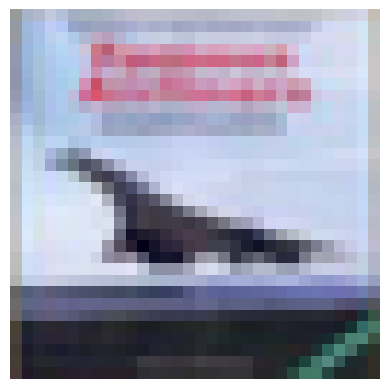

In [ ]:
#show random image
rnd_sample_idx = np.random.randint(len(test_loader))
print(f'The sampled image represents a: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)

In [ ]:
#image size details
# Obtains the first image of the CIFAR-10 training set.
sample_image, _ = cifar10_train[0]

# Gets the dimensions (size) of the sample image.
image_size = sample_image.size()

# Prints the dimensions of the image.
print(image_size)

torch.Size([3, 32, 32])


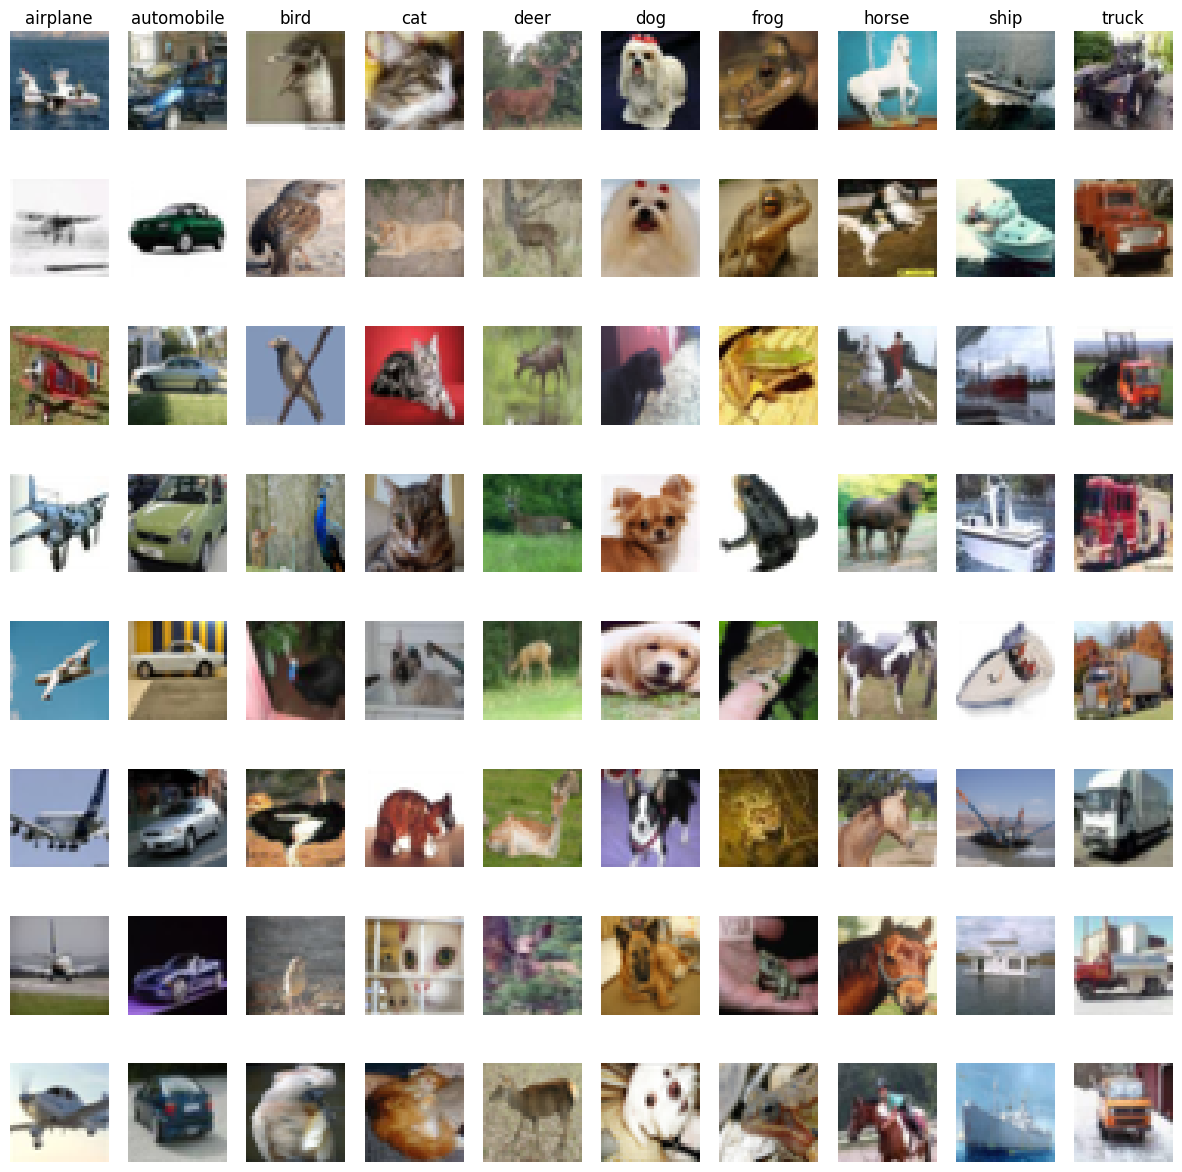

In [ ]:
def plot_cifar10_grid():
    classes = test_loader.dataset.classes
    total_samples = 8
    plt.figure(figsize=(15,15))
    for label, sample in enumerate(classes):
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')

            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid()

## **Calculate Accuracy**



- If we want to measure the performance of a model after training it or during its validation, the combination between accuracy and cost provides a complete view of the behavior of our models, with this we could make decisions that allow us to improve it if it is the case or give it the use if it is ready.

- According to what the professor says in the video we could say the following:

- The **accuracy function** evaluates the performance of a model using four parameters: the model itself, the dataset inputs, the actual labels and the minibatch size. It starts by initializing counters and an accumulator to monitor correct predictions, total predictions and cost respectively. The model is put into evaluation mode and transferred to the appropriate device, such as a GPU. ***During the evaluation, no gradients are calculated to optimize efficiency.

- In the process, **minibatches are used to compare the model predictions with the actual labels**, thus calculating **accuracy and cost**. Finally, the function **provides the average cost and accuracy to get a clear idea of the model performance**, being useful for post-training reviews or validations.

In [ ]:
"""
    Calculates the average model accuracy and cost for a data set.

    Args:
    - model: PyTorch model to evaluate.
    - x: Input data.
    - y: Data labels.
    - mb_size: Minibatch size.

    Returns:
    - Average cost.
    - Model accuracy.
    """
def accuracy(model, loader):

    # Initialization of counters for correct and totals
    correct  = 0
    total  = 0

    #The model is placed in evaluation mode
    model.eval()

    #The model is transferred to the device specified by the device variable (which is not defined in this code fragment, but could be a CPU or GPU).
    model = model.to(device=device)

    #Gradients will be calculated during operations within this block. This speeds up operations and reduces memory usage, since we do not need gradients during evaluation.
    with torch.no_grad():

        #Iterates over the data loader. Each data element in loader is a batch of images and labels.
        for data in loader:
            images, labels = data                                               #Images and tags are transferred to the specified device and ensure that they have the correct data type (torch.float32 for images and torch.long for tags).
            images = images.to(device=device, dtype = torch.float32)
            labels = labels.to(device=device, dtype = torch.long)
            scores = model(images)                                              #10 classes are assumed, so the output size is (mb_size, 10), where mb_size is the batch size.
            _, pred = scores.max(dim=1)                                         #pred shape (mb_size )
            correct += (pred == labels).sum()                                   #pred shape (mb_size), yi shape (mb_size, 1)
            total += pred.size(0)                                               #Se actualiza el contador total con el número de muestras en el lote actual.

        return float(correct)/total                                             ##Accuracy calculated as the number of correct predictions divided by the total number of samples.

## **Training Loop**

The training loop helps us to improve the models by making use of an optimizer, loaded data and a number of ephocs (100 by default).

- To make it work, a model must be initialized with the 3 parameters mentioned above and transferred to the device that helps the model execution.

- Then an iteration is performed with the specified number of epochs. The idea of training the model is to find **what to fit**.

- Use is made of **running_loss at 0**, which will be used to calculate the cumulative loss during ephoc.

- Images and labels are extracted from the current batch of data.

- The batch of images is passed through the model to obtain the predictions (**scores**).

- The loss between the predictions and the true labels is calculated using the **crossentropy** loss function.

- The gradient of the optimizer is reset, the gradient of the loss with respect to the model parameters is calculated and an optimization step is performed.

- **Running_loss** is updated with the loss of the current batch.

- After iterating over all batches, the **model accuracy** is calculated in the validation set (val_loader).

- The information about the average loss of the **epoch** and the model **accuracy** in the validation set is printed.

- The average loss divided by the minibatch size (**MINIBATCH_SIZE**) is printed.

- **Running_loss** is reset to 0 for the next epoch.

- Once all epochs have been completed, **"Finished Training "** is printed to indicate that the training process has been completed.

In [ ]:
def train(model, optimiser, epochs=100):
    model = model.to(device=device)


    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader):
            model.train()
            images, labels = data
            images = images.to(device=device, dtype=torch.float32)
            labels = labels.to(device=device, dtype=torch.long)
            scores = model(images)

            cost = F.cross_entropy(input= scores, target=labels)

            optimiser.zero_grad()
            cost.backward()
            optimiser.step()

            running_loss += cost.item()  # Update running_loss

        acc = accuracy(model, val_loader)
        print(f'Epoch: {epoch}, cost: {running_loss / len(train_loader)}, accuracy: {acc * 100}%')
        #if i % MINIBATCH_SIZE == MINIBATCH_SIZE-1:  # print every mini-batches
        print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / MINIBATCH_SIZE))
        running_loss = 0.0  # Reset running_loss after printing

    print('Finished Training')



### **Linear model**

**Linear Model with 3 ReLU Activation Layers and 1 Linear Output Layer.**

In [ ]:
#Linear model to have an initial baseline model
class LinearNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearNN, self).__init__()
        #model Definition
        self.model = nn.Sequential(
          nn.Flatten(), #Flaten the image to one dimension
          nn.Linear(in_features=input_size, out_features=200), # fully connected layer
          nn.ReLU(), #layer applies the Rectified Linear Unit (ReLU) activation function, which introduces non-linearity to the model.
          nn.Dropout(), #Layer introduces dropout, a regularization technique that randomly sets a fraction of input units to zero during training to reduce overfitting.
          nn.Linear(in_features=200, out_features=200), # fully connected layer
          nn.ReLU(),
          nn.Linear(in_features=200, out_features=output_size), # fully connected layer
          nn.ReLU(),
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
input_size = 32 * 32 * 3      #image size: torch.Size([3, 32, 32])
output_size =  10             # 10 classes
linear_model = LinearNN(input_size, output_size)


In [ ]:
#Define the Optimizer
#using stochastic gradient descent
optimizer = optim.SGD(linear_model.parameters(), lr=56e-3)
train(linear_model, optimizer, epochs = 10)

Epoch: 0, cost: 1.3447502316416378, accuracy: 53.42%
[1,   782] loss: 16.431
Epoch: 1, cost: 1.3366708313412679, accuracy: 51.78%
[2,   782] loss: 16.332
Epoch: 2, cost: 1.321420231057555, accuracy: 52.580000000000005%
[3,   782] loss: 16.146
Epoch: 3, cost: 1.3120053198636341, accuracy: 53.1%
[4,   782] loss: 16.031
Epoch: 4, cost: 1.3079396477898064, accuracy: 52.059999999999995%
[5,   782] loss: 15.981
Epoch: 5, cost: 1.3015700911012147, accuracy: 51.6%
[6,   782] loss: 15.904
Epoch: 6, cost: 1.2946577757368307, accuracy: 53.7%
[7,   782] loss: 15.819
Epoch: 7, cost: 1.2873048067397779, accuracy: 52.78%
[8,   782] loss: 15.729
Epoch: 8, cost: 1.271772718490542, accuracy: 51.42%
[9,   782] loss: 15.539
Epoch: 9, cost: 1.275386012728562, accuracy: 52.78%
[10,   782] loss: 15.584
Finished Training


In [ ]:
print(f'Accuracy of the network with the test set is { accuracy(linear_model, test_loader):0.2%}' )

Accuracy of the network with the test set is 50.66%


### **Sequential CNN**

This is a CNN model with the following architecture:

1. Two Convolutional Layers with ReLU activation.
   - First layer with 16 channels and a kernel size of 5.
   - Second layer with 32 channels and a kernel size of 5.
2. Batch Normalization between each convolutional layer.
3. MaxPooling with a 2x2 kernel.
4. A final Linear Layer with ReLU activation.

The optimization algorithm used is Stochastic Gradient Descent (SGD).

In [ ]:
class ConvolutionalNN(nn.Module):
    def __init__(self, input_channels, output_size):
        super(ConvolutionalNN, self).__init__()

        self.model = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels=16, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(in_features=32*16*16, out_features=output_size),  #32 channels * 16*16 inmage size
            nn.ReLU()
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
input_size = 3    #chanels
output_size = 10  # 10 classes
net = ConvolutionalNN(input_size,output_size)

In [ ]:
#Define the Optimizer
optimizer = optim.SGD(net.parameters(), lr=0.0001)
train(net, optimizer, epochs=10)

Epoch: 0, cost: 0.8597189903716602, accuracy: 65.62%
[1,   782] loss: 10.505
Epoch: 1, cost: 0.8302137411159017, accuracy: 65.92%
[2,   782] loss: 10.144
Epoch: 2, cost: 0.8189064628632782, accuracy: 66.03999999999999%
[3,   782] loss: 10.006
Epoch: 3, cost: 0.8090328830282402, accuracy: 66.34%
[4,   782] loss: 9.885
Epoch: 4, cost: 0.8005930417791352, accuracy: 66.32000000000001%
[5,   782] loss: 9.782
Epoch: 5, cost: 0.7953654540621716, accuracy: 66.7%
[6,   782] loss: 9.718
Epoch: 6, cost: 0.7881556887684575, accuracy: 66.92%
[7,   782] loss: 9.630
Epoch: 7, cost: 0.7832888932255528, accuracy: 66.60000000000001%
[8,   782] loss: 9.571
Epoch: 8, cost: 0.7793475526677983, accuracy: 66.84%
[9,   782] loss: 9.523
Epoch: 9, cost: 0.7745762048551189, accuracy: 66.94%
[10,   782] loss: 9.464
Finished Training


In [ ]:
print(f'Accuracy of the network with the test set is { accuracy(net, test_loader):0.2%}' )

Accuracy of the network with the test set is 65.26%


### **Dynamic Sequential CNN**

For ease of testing, a CNN model has been created that allows for the specification of the number and parameters of the CNN layers. It concludes with a final linear layer with ReLU activation for classification. Additionally, it includes a Batch Normalization layer between each convolutional layer and a 2x2 MaxPooling layer before the linear output.


In [ ]:
class DynamicConvolutionalNN(nn.Module):
    def __init__(self, img_len, img_with, input_channels, output_size, conv_layer_specs):
        super(DynamicConvolutionalNN, self).__init__()

        conv_layers = []
        in_channels = input_channels

        for out_channels, kernel_size, padding in conv_layer_specs:
            # Add a convolutional layer
            conv_layers.append(nn.Conv2d(in_channels, out_channels, kernel_size, padding=padding))
            # Add ReLU activation for each layer
            conv_layers.append(nn.ReLU())
            # Add a Batch Normalization after each convolutional layer
            conv_layers.append(nn.BatchNorm2d(out_channels))
            # Update in_channels for the next layer
            in_channels = out_channels

        # Add a max pooling layer at the end and a flattening layer for the fully connected layer
        conv_layers.extend([
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten()
        ])

        # Calculate the size of the linear layer's input
        # This requires a dummy input to compute the output size after convolutional layers
        # Sends dummy data and evaluates the layers so it can calculate the total outpult
        dummy_input = torch.randn(1, input_channels, img_len, img_with)  # Assuming 32x32 input size
        dummy_output = self.calc_cnn_out_size(dummy_input, conv_layers)
        linear_input_size = dummy_output.view(dummy_output.size(0), -1).size(1)

        # Add linear layer
        conv_layers.append(nn.Linear(linear_input_size, output_size))

        # Create the model
        self.model = nn.Sequential(*conv_layers)

    def calc_cnn_out_size(self, x, layers):
        #traverse all the layers in the model and get the final size of the output
        for layer in layers:
            x = layer(x)
        return x

    def forward(self, x):
        return self.model(x)

### **Sequential CNN with 16 and 32 Channels**

This model consists of:

1. Two Convolutional Layers with ReLU activation and Batch Normalization between layers:
   - First layer with 16 channels and a kernel size of 3.
   - Second layer with 32 channels and a kernel size of 3.

2. MaxPooling with a 2x2 kernel.

3. A Fully Connected Linear Layer with ReLU activation.



The optimization algorithm used is Stochastic Gradient Descent (SGD).

In [ ]:
conv_layer_specs = [(16, 3, 1), (32, 3, 1)]  # specifications of convolutional layers [(out_Chanels, kernel, padding), (out_Chanels, kernel, padding)]
model = DynamicConvolutionalNN(input_channels=3, img_len=32, img_with=32, output_size=10, conv_layer_specs=conv_layer_specs)

In [ ]:
#Define the Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)
train(model, optimizer, epochs=10)

Epoch: 0, cost: 1.3701211827642776, accuracy: 55.46%
[1,   782] loss: 16.741
Epoch: 1, cost: 1.025345286673597, accuracy: 56.620000000000005%
[2,   782] loss: 12.528
Epoch: 2, cost: 0.8716889406409105, accuracy: 59.48%
[3,   782] loss: 10.651
Epoch: 3, cost: 0.7751851893218277, accuracy: 62.239999999999995%
[4,   782] loss: 9.472
Epoch: 4, cost: 0.7054301269371491, accuracy: 61.78%
[5,   782] loss: 8.619
Epoch: 5, cost: 0.6471140659831064, accuracy: 63.739999999999995%
[6,   782] loss: 7.907
Epoch: 6, cost: 0.5982651667445517, accuracy: 65.08%
[7,   782] loss: 7.310
Epoch: 7, cost: 0.5525573036059395, accuracy: 64.58%
[8,   782] loss: 6.752
Epoch: 8, cost: 0.5190102077658524, accuracy: 64.56%
[9,   782] loss: 6.342
Epoch: 9, cost: 0.4818464573234548, accuracy: 65.62%
[10,   782] loss: 5.888
Finished Training


In [ ]:
print(f'Accuracy of the network with the test set is { accuracy(model, test_loader):0.2%}' )

Accuracy of the network with the test set is 63.98%


### **Sequential CNN with 16 and 32 Channels.**

This model consists of:

1. Two Convolutional Layers with ReLU activation and Batch Normalization between layers:
   - First layer with 16 channels and a kernel size of 5.
   - Second layer with 32 channels and a kernel size of 5.

2. MaxPooling with a 2x2 kernel.

3. A Fully Connected Linear Layer with ReLU activation.



The optimization algorithm used is Stochastic Gradient Descent (SGD).

In [ ]:
conv_layer_specs = [(16, 5, 2), (32, 5, 2)]  # specifications of convolutional layers [(out_Chanels, kernel, padding), (out_Chanels, kernel, padding)]
model = DynamicConvolutionalNN(input_channels=3, img_len=32, img_with=32, output_size=10, conv_layer_specs=conv_layer_specs)

In [ ]:
#Define the Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)
train(model, optimizer, epochs=10)

Epoch: 0, cost: 0.8884348806060488, accuracy: 65.44%
[1,   782] loss: 10.856
Epoch: 1, cost: 0.836294750652045, accuracy: 65.94%
[2,   782] loss: 10.218
Epoch: 2, cost: 0.8118089738175692, accuracy: 66.44%
[3,   782] loss: 9.919
Epoch: 3, cost: 0.7910328647669624, accuracy: 66.78%
[4,   782] loss: 9.665
Epoch: 4, cost: 0.7740844575416707, accuracy: 67.0%
[5,   782] loss: 9.458
Epoch: 5, cost: 0.756856761929934, accuracy: 66.9%
[6,   782] loss: 9.248
Epoch: 6, cost: 0.7435882027877871, accuracy: 67.4%
[7,   782] loss: 9.086
Epoch: 7, cost: 0.7292893425278042, accuracy: 67.86%
[8,   782] loss: 8.911
Epoch: 8, cost: 0.7153608112993752, accuracy: 66.97999999999999%
[9,   782] loss: 8.741
Epoch: 9, cost: 0.7021425558859126, accuracy: 67.14%
[10,   782] loss: 8.579
Finished Training


In [ ]:
print(f'Accuracy of the network with the test set is { accuracy(model, test_loader):0.2%}' )

Accuracy of the network with the test set is 67.62%


### **Sequential CNN with 32 and 64 Channels**

This model consists of:

1. Two Convolutional Layers with ReLU activation and Batch Normalization between layers:
   - First layer with 32 channels and a kernel size of 3.
   - Second layer with 64 channels and a kernel size of 3.

2. MaxPooling with a 2x2 kernel.

3. A Fully Connected Linear Layer with ReLU activation.



The optimization algorithm used is Stochastic Gradient Descent (SGD).

In [ ]:
conv_layer_specs = [(32, 3, 1), (64, 3, 1)]  # specifications of convolutional layers [(out_Chanels, kernel, padding), (out_Chanels, kernel, padding)]
model = DynamicConvolutionalNN(input_channels=3, img_len=32, img_with=32, output_size=10, conv_layer_specs=conv_layer_specs)

In [ ]:
#Define the Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.0001)
train(model, optimizer, epochs=10)

Epoch: 0, cost: 0.8695795768133515, accuracy: 64.12%
[1,   782] loss: 10.625
Epoch: 1, cost: 0.8075614993643883, accuracy: 64.96%
[2,   782] loss: 9.867
Epoch: 2, cost: 0.7783122266573674, accuracy: 65.58%
[3,   782] loss: 9.510
Epoch: 3, cost: 0.7588211226341365, accuracy: 65.58%
[4,   782] loss: 9.272
Epoch: 4, cost: 0.7464514562236074, accuracy: 65.88000000000001%
[5,   782] loss: 9.121
Epoch: 5, cost: 0.7320951483667354, accuracy: 65.86%
[6,   782] loss: 8.945
Epoch: 6, cost: 0.722396469024746, accuracy: 65.96%
[7,   782] loss: 8.827
Epoch: 7, cost: 0.7132031704153856, accuracy: 66.42%
[8,   782] loss: 8.714
Epoch: 8, cost: 0.7057473515458119, accuracy: 66.74%
[9,   782] loss: 8.623
Epoch: 9, cost: 0.6983528366250455, accuracy: 67.06%
[10,   782] loss: 8.533
Finished Training


In [ ]:
print(f'Accuracy of the network with the test set is { accuracy(model, test_loader):0.2%}' )

Accuracy of the network with the test set is 66.50%


### **Sequential CNN with 32 and 64 Channels**

This model consists of:

1. Two Convolutional Layers with ReLU activation and Batch Normalization between layers:
   - First layer with 32 channels and a kernel size of 5.
   - Second layer with 64 channels and a kernel size of 5.

2. MaxPooling with a 2x2 kernel.

3. A Fully Connected Linear Layer with ReLU activation.



The optimization algorithm used is Stochastic Gradient Descent (SGD).

In [ ]:
conv_layer_specs = [(32, 5, 2), (64, 5, 2)]  # specifications of convolutional layers [(out_Chanels, kernel, padding), (out_Chanels, kernel, padding)]
model = DynamicConvolutionalNN(input_channels=3, img_len=32, img_with=32, output_size=10, conv_layer_specs=conv_layer_specs)

In [ ]:
#Define the Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)
train(model, optimizer, epochs=10)

Epoch: 0, cost: 0.9141720139309574, accuracy: 63.63999999999999%
[1,   782] loss: 11.170
Epoch: 1, cost: 0.8385634474132372, accuracy: 64.24%
[2,   782] loss: 10.246
Epoch: 2, cost: 0.7717261238171317, accuracy: 65.08%
[3,   782] loss: 9.430
Epoch: 3, cost: 0.7200986059654094, accuracy: 66.84%
[4,   782] loss: 8.799
Epoch: 4, cost: 0.6759285825064115, accuracy: 65.94%
[5,   782] loss: 8.259
Epoch: 5, cost: 0.6334591137478723, accuracy: 65.66%
[6,   782] loss: 7.740
Epoch: 6, cost: 0.5969959154077198, accuracy: 67.97999999999999%
[7,   782] loss: 7.295
Epoch: 7, cost: 0.5606333334808764, accuracy: 67.16%
[8,   782] loss: 6.850
Epoch: 8, cost: 0.5290946175375253, accuracy: 65.75999999999999%
[9,   782] loss: 6.465
Epoch: 9, cost: 0.49700828696913124, accuracy: 67.06%
[10,   782] loss: 6.073
Finished Training


In [ ]:
print(f'Accuracy of the network with the test set is { accuracy(model, test_loader):0.2%}' )

Accuracy of the network with the test set is 65.50%



### **Sequential CNN with 16, 32 and 64 Channels**

This model consists of:

1. Two Convolutional Layers with ReLU activation and Batch Normalization between layers:
   - First layer with 16 channels and a kernel size of 3.
   - Second layer with 32 channels and a kernel size of 3.
   - Third layer with 64 channels and a kernel size of 3.
2. MaxPooling with a 2x2 kernel.

3. A Fully Connected Linear Layer with ReLU activation.



The optimization algorithm used is Stochastic Gradient Descent (SGD).

In [ ]:
conv_layer_specs = [(16, 3, 1), (32, 3, 1), (64, 3, 1)]  # specifications of convolutional layers [(out_Chanels, kernel, padding), (out_Chanels, kernel, padding)]
model = DynamicConvolutionalNN(input_channels=3, img_len=32, img_with=32, output_size=10, conv_layer_specs=conv_layer_specs)

In [ ]:
#Define the Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)
train(model, optimizer, epochs=10)

Epoch: 0, cost: 1.3410465928447215, accuracy: 56.74%
[1,   782] loss: 16.386
Epoch: 1, cost: 1.0796265238538727, accuracy: 59.699999999999996%
[2,   782] loss: 13.192
Epoch: 2, cost: 0.9405120974763885, accuracy: 60.440000000000005%
[3,   782] loss: 11.492
Epoch: 3, cost: 0.8439937406946021, accuracy: 61.08%
[4,   782] loss: 10.313
Epoch: 4, cost: 0.7726803881585446, accuracy: 66.08000000000001%
[5,   782] loss: 9.441
Epoch: 5, cost: 0.7139320830097589, accuracy: 65.68%
[6,   782] loss: 8.723
Epoch: 6, cost: 0.6633973527137581, accuracy: 65.10000000000001%
[7,   782] loss: 8.106
Epoch: 7, cost: 0.6173560790469884, accuracy: 64.98%
[8,   782] loss: 7.543
Epoch: 8, cost: 0.5748375172124189, accuracy: 62.160000000000004%
[9,   782] loss: 7.024
Epoch: 9, cost: 0.5399579269349423, accuracy: 66.14%
[10,   782] loss: 6.598
Finished Training


In [ ]:
print(f'Accuracy of the network with the test set is { accuracy(model, test_loader):0.2%}' )

Accuracy of the network with the test set is 65.40%


### **Sequential CNN with 16, 32 and 64 Channels**

This model consists of:

1. Two Convolutional Layers with ReLU activation and Batch Normalization between layers:
   - First layer with 16 channels and a kernel size of 5.
   - Second layer with 32 channels and a kernel size of 5.
   - Third layer with 64 channels and a kernel size of 5.
2. MaxPooling with a 2x2 kernel.

3. A Fully Connected Linear Layer with ReLU activation.



The optimization algorithm used is Stochastic Gradient Descent (SGD).

In [ ]:
conv_layer_specs = [(16, 5, 2), (32, 5, 2), (64, 5, 2)]  # specifications of convolutional layers [(out_Chanels, kernel, padding), (out_Chanels, kernel, padding)]
model = DynamicConvolutionalNN(input_channels=3, img_len=32, img_with=32, output_size=10, conv_layer_specs=conv_layer_specs)

In [ ]:
#Define the Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.5)
train(model, optimizer, epochs=10)

Epoch: 0, cost: 0.2803248790904994, accuracy: 70.1%
[1,   782] loss: 3.425
Epoch: 1, cost: 0.27719753005963454, accuracy: 70.0%
[2,   782] loss: 3.387
Epoch: 2, cost: 0.27301811799407005, accuracy: 70.04%
[3,   782] loss: 3.336
Epoch: 3, cost: 0.27039882786514813, accuracy: 70.08%
[4,   782] loss: 3.304
Epoch: 4, cost: 0.26613114450288855, accuracy: 70.17999999999999%
[5,   782] loss: 3.252
Epoch: 5, cost: 0.2632250428923865, accuracy: 70.32000000000001%
[6,   782] loss: 3.216
Epoch: 6, cost: 0.26085632075281706, accuracy: 70.04%
[7,   782] loss: 3.187
Epoch: 7, cost: 0.2566195532793889, accuracy: 70.17999999999999%
[8,   782] loss: 3.136
Epoch: 8, cost: 0.2538041788846483, accuracy: 70.0%
[9,   782] loss: 3.101
Epoch: 9, cost: 0.25165790067914195, accuracy: 69.96%
[10,   782] loss: 3.075
Finished Training


In [ ]:
print(f'Accuracy of the network with the test set is { accuracy(model, test_loader):0.2%}' )

Accuracy of the network with the test set is 70.24%


### **Sequential CNN with 16, 32, 64 and 128 Channels.**

This model consists of:

1. Two Convolutional Layers with ReLU activation and Batch Normalization between layers:
   - First layer with 16 channels and a kernel size of 3.
   - Second layer with 32 channels and a kernel size of 3.
   - Third layer with 64 channels and a kernel size of 3.
   - Fourth layer with 128 channels and a kernel size of 3.
2. MaxPooling with a 2x2 kernel.

3. A Fully Connected Linear Layer with ReLU activation.



The optimization algorithm used is Stochastic Gradient Descent (SGD).

In [ ]:
conv_layer_specs = [(16, 3, 1), (32, 3, 1), (64, 3, 1), (128, 3, 1)]  # specifications of convolutional layers [(out_Chanels, kernel, padding), (out_Chanels, kernel, padding)...]
model = DynamicConvolutionalNN(input_channels=3,  img_len=32, img_with=32, output_size=10, conv_layer_specs=conv_layer_specs)

In [ ]:
#Define the Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)
train(model, optimizer, epochs=10)

Epoch: 0, cost: 1.04860064341589, accuracy: 63.660000000000004%
[1,   782] loss: 12.813
Epoch: 1, cost: 0.8337067878612167, accuracy: 64.16%
[2,   782] loss: 10.187
Epoch: 2, cost: 0.7535095932462331, accuracy: 65.28%
[3,   782] loss: 9.207
Epoch: 3, cost: 0.7041743200300904, accuracy: 66.12%
[4,   782] loss: 8.604
Epoch: 4, cost: 0.6626180734323419, accuracy: 65.78%
[5,   782] loss: 8.096
Epoch: 5, cost: 0.6294089273342391, accuracy: 66.82000000000001%
[6,   782] loss: 7.691
Epoch: 6, cost: 0.5950048413041913, accuracy: 66.0%
[7,   782] loss: 7.270
Epoch: 7, cost: 0.5676031589050732, accuracy: 66.12%
[8,   782] loss: 6.935
Epoch: 8, cost: 0.5419248882157114, accuracy: 66.4%
[9,   782] loss: 6.622
Epoch: 9, cost: 0.5165202801146775, accuracy: 67.02%
[10,   782] loss: 6.311
Finished Training


In [ ]:
print(f'Accuracy of the network with the test set is { accuracy(model, test_loader):0.2%}' )

Accuracy of the network with the test set is 66.06%


### **Sequential CNN with 16, 32, 64 and 128 Channels.**

This model consists of:

1. Two Convolutional Layers with ReLU activation and Batch Normalization between layers:
   - First layer with 16 channels and a kernel size of 5.
   - Second layer with 32 channels and a kernel size of 5.
   - Third layer with 64 channels and a kernel size of 5.
   - Fourth layer with 128 channels and a kernel size of 5.
2. MaxPooling with a 2x2 kernel.

3. A Fully Connected Linear Layer with ReLU activation.



The optimization algorithm used is Stochastic Gradient Descent (SGD).

In [ ]:
conv_layer_specs = [(16, 5, 2), (32, 5, 2), (64, 5, 2), (128, 5, 2)]  # specifications of convolutional layers [(out_Chanels, kernel, padding), (out_Chanels, kernel, padding)...]
model = DynamicConvolutionalNN(input_channels=3, img_len=32, img_with=32, output_size=10, conv_layer_specs=conv_layer_specs)

In [ ]:
#Define the Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.0000001, momentum=0.9)
train(model, optimizer, epochs=10)

Epoch: 0, cost: 0.3789132432559567, accuracy: 70.6%
[1,   782] loss: 4.630
Epoch: 1, cost: 0.380603851278877, accuracy: 70.64%
[2,   782] loss: 4.651
Epoch: 2, cost: 0.38074341231523573, accuracy: 70.6%
[3,   782] loss: 4.652
Epoch: 3, cost: 0.37974176494895345, accuracy: 70.64%
[4,   782] loss: 4.640
Epoch: 4, cost: 0.37976593979636725, accuracy: 70.52000000000001%
[5,   782] loss: 4.640
Epoch: 5, cost: 0.38036064018526344, accuracy: 70.67999999999999%
[6,   782] loss: 4.648
Epoch: 6, cost: 0.37939314628043747, accuracy: 70.58%
[7,   782] loss: 4.636
Epoch: 7, cost: 0.3799256024801213, accuracy: 70.48%
[8,   782] loss: 4.642
Epoch: 8, cost: 0.37832018483401564, accuracy: 70.56%
[9,   782] loss: 4.623
Epoch: 9, cost: 0.37835101787086645, accuracy: 70.67999999999999%
[10,   782] loss: 4.623
Finished Training


In [ ]:
print(f'Accuracy of the network with the test set is { accuracy(model, test_loader):0.2%}' )

Accuracy of the network with the test set is 69.84%


### **Sequential CNN with 16, 32, 64 and 128 Channels.**

This model consists of:

1. Two Convolutional Layers with ReLU activation and Batch Normalization between layers:
   - First layer with 16 channels and a kernel size of 5.
   - Second layer with 32 channels and a kernel size of 5.
   - Third layer with 64 channels and a kernel size of 5.
   - Fourth layer with 128 channels and a kernel size of 5.
2. MaxPooling with a 2x2 kernel.

3. A Fully Connected Linear Layer with ReLU activation.



The optimization algorithm used is Adaptive Moment Estimation (Adam).

In [ ]:
conv_layer_specs = [(16, 5, 1), (32, 5, 1), (64, 5, 1), (128, 5, 1)]  # specifications of convolutional layers [(out_Chanels, kernel, padding), (out_Chanels, kernel, padding)...]
model = DynamicConvolutionalNN(input_channels=3,  img_len=32, img_with=32, output_size=10, conv_layer_specs=conv_layer_specs)

In [ ]:
#Define the Optimizer
optimizer = optim.Adam(model.parameters(), lr=7e-5)
train(model, optimizer, epochs=10)

Epoch: 0, cost: 0.08928827695962985, accuracy: 70.06%
[1,   782] loss: 1.091
Epoch: 1, cost: 0.07085685672618382, accuracy: 70.67999999999999%
[2,   782] loss: 0.866
Epoch: 2, cost: 0.06134314980367413, accuracy: 70.6%
[3,   782] loss: 0.750
Epoch: 3, cost: 0.05431310537298482, accuracy: 70.7%
[4,   782] loss: 0.664
Epoch: 4, cost: 0.05032720215960413, accuracy: 70.5%
[5,   782] loss: 0.615
Epoch: 5, cost: 0.04770064119355577, accuracy: 70.89999999999999%
[6,   782] loss: 0.583
Epoch: 6, cost: 0.043468853391771256, accuracy: 70.67999999999999%
[7,   782] loss: 0.531
Epoch: 7, cost: 0.03982808664345833, accuracy: 70.52000000000001%
[8,   782] loss: 0.487
Epoch: 8, cost: 0.03720034700726061, accuracy: 70.8%
[9,   782] loss: 0.455
Epoch: 9, cost: 0.0360332362441932, accuracy: 70.48%
[10,   782] loss: 0.440
Finished Training


In [ ]:
print(f'Accuracy of the network with the test set is { accuracy(model, test_loader):0.2%}' )

Accuracy of the network with the test set is 70.22%


### **Conclusions**

In summary, the results of the experiments indicate the following:

- The linear model with three layers achieved a maximum of between 52.9% and 54.22% accuracy.

- The convolutional models outperformed these results, achieving a range between 65% and 70% accuracy.

- The SGD optimizer (Stochastic Gradient Descent) was used for all models, and the Adam optimizer (Adaptive Moment Estimation) was employed in the last model, which yielded the best results, although a significant improvement in accuracy was not observed.

- The learning rate was kept constant at 0.001 for all models.

- Models with a kernel size of 5 outperformed those with a kernel size of 3 in terms of performance.

- As the number of convolutional layers was increased and the number of channels was raised, improvements in accuracy were obtained, albeit at a higher computational cost.

- The optimal value might be found with 3 convolutional layers and a maximum of 64 channels.

In conclusion, for this dataset, convolutional models with two convolutional layers and 64 channels, using a kernel size of 5, along with the SGD optimizer and a learning rate of 0.001, proved to be the most effective in terms of accuracy and computational efficiency.
